
**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Edición 2022**

---

# Varias Variables

In [ ]:
import io
import matplotlib
import matplotlib.pyplot as plt
import numpy
import pandas as pd
import seaborn

seaborn.set_context('talk')

## Lectura del dataset

En la notebook 00 se explican los detalles de la siguiente sección.

In [ ]:
url = 'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/sysarmy_survey_2020_processed.csv'
df = pd.read_csv(url)

In [ ]:
df[:3]

,profile_gender,profile_age,work_country,work_province,profile_years_experience,work_years_in_company,work_years_in_current_position,work_people_in_charge_of,profile_studies_level,profile_studies_level_state,...,work_has_violence_situations,profile_sexual_orientation,profile_has_disabilities,profile_has_disabilities_hiring_difficulties,company_employee_number,company_main_activity,company_recommended,company_diversity_policies,company_extra_benefits,company_best_companies_city
0,Mujer,26,Argentina,Ciudad Autónoma de Buenos Aires,3.0,3.0,3.0,0,Universitario,En curso,...,En mi trabajo actual,Homosexual,NaN,NaN,501-1000,Servicios / Consultoría de Software / Digital,7,2,"Capacitaciones y/o cursos, Comidas pagas / sub...",NaN
1,Hombre,29,Argentina,Corrientes,5.0,2.0,2.0,4,Universitario,En curso,...,Jamás,Heterosexual,Visual,No,201-500,Otras industrias,8,9,"Horarios flexibles, Stock options / RSUs, Viát...",NaN
2,Mujer,22,Argentina,Ciudad Autónoma de Buenos Aires,2.0,0.0,0.0,0,Secundario,Completado,...,En un trabajo anterior,Bisexual o queer,NaN,No,2001-5000,Otras industrias,6,9,"Clases de gimnasia online, Comidas pagas / sub...",NaN


# Variables Categóricas


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


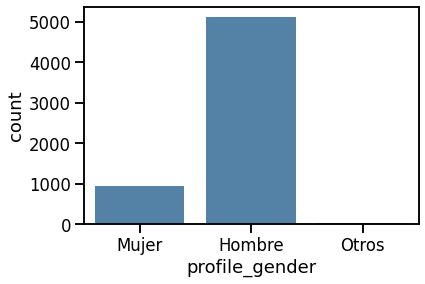

0        Mujer
1       Hombre
2        Mujer
3       Hombre
4       Hombre
         ...  
6090    Hombre
6091    Hombre
6092    Hombre
6093    Hombre
6094    Hombre
Name: profile_gender, Length: 6095, dtype: object
<class 'pandas.core.series.Series'>


In [ ]:
fig = plt.figure(figsize=(6,4)) #se genera la figura y se define su tamaño
seaborn.countplot(df.profile_gender, color='steelblue') # gráfico de conteos de la primer columna (profile_gender)
plt.show()
print(df.profile_gender) #columna
print(type(df.profile_gender)) #tipo de datos, es útil imprimir y entender el tipo de datos, dimensiones, etc.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


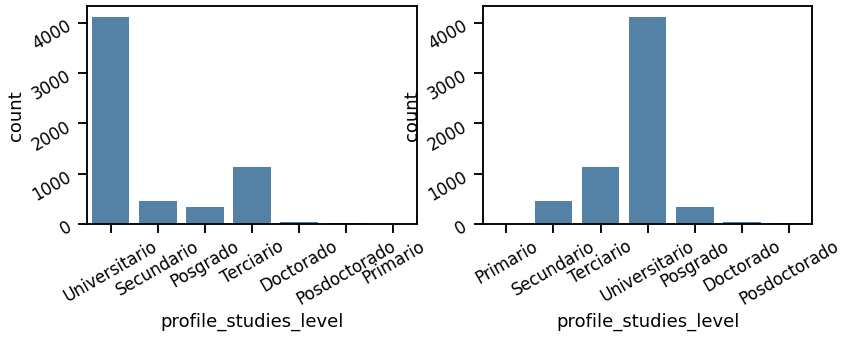

In [ ]:
sorted_studies_levels = ['Primario', 'Secundario', 'Terciario', 'Universitario',
                         'Posgrado', 'Doctorado', 'Posdoctorado'] #lista de los nombres de categorías ordenadas
fig, axes = plt.subplots(ncols=2, figsize=(13,4)) #se genera la figura, se divide en dos lugares y se define su tamaño
g = seaborn.countplot(df.profile_studies_level, color='steelblue', ax=axes[0]) #gráfico de conteos (en el lugar 0)
g = seaborn.countplot(df.profile_studies_level, color='steelblue', ax=axes[1],
                  order=sorted_studies_levels)      #gráfico de conteos ordenado (en el lugar 1)
for ax in axes:
  ax.tick_params(labelrotation=30)  # en cada lugar (ax in axes) se rota la etiqueta

# Variables Numéricas


In [ ]:
salary_col='salary_monthly_BRUTO' #defino variable con el nombre de la columna de interés
#salary_col='salary_monthly_NETO'

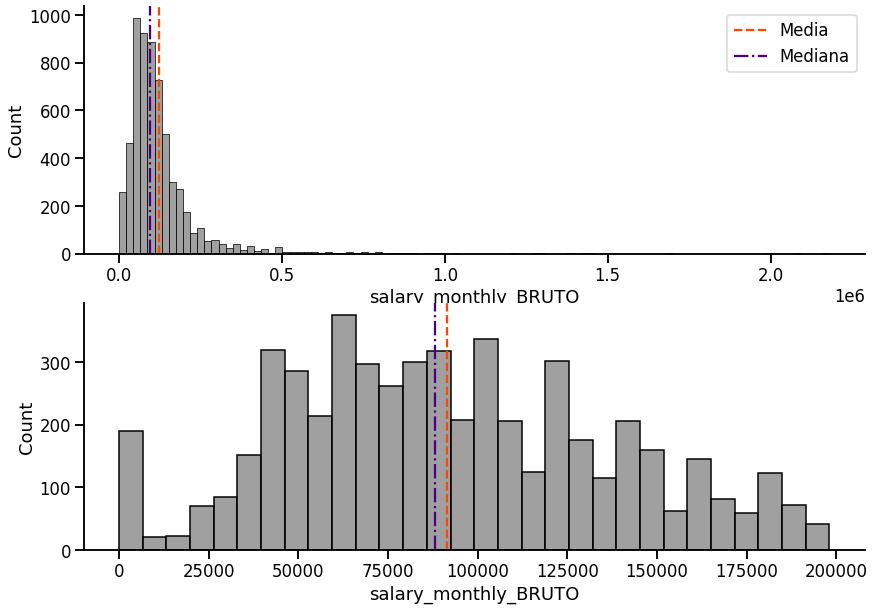

In [ ]:
fig, axes = plt.subplots(nrows=2, figsize=(14, 10)) #se genera la figura, se divide en dos lugares y se define su tamaño

seaborn.histplot(df[salary_col], bins=100, ax=axes[0], color='gray') #Histograma con 100 bins
axes[0].axvline(df[salary_col].mean(), color='orangered',
            linestyle='--', label='Media')
axes[0].axvline(df[salary_col].median(), color='indigo',
            linestyle='-.', label='Mediana')

filtered_df = df[df[salary_col] < 200000] 
seaborn.histplot(filtered_df[salary_col], bins=30, ax=axes[1], color='gray')
axes[1].axvline(filtered_df[salary_col].mean(), color='orangered',
            linestyle='--', label='Media')
axes[1].axvline(filtered_df[salary_col].median(), color='indigo',
            linestyle='-.', label='Mediana')

axes[0].legend()
seaborn.despine()

In [ ]:
print(df[salary_col][:4])
print(type(df[salary_col]))

0     53000.0
1     79000.0
2    160000.0
3    130000.0
Name: salary_monthly_BRUTO, dtype: float64
<class 'pandas.core.series.Series'>


#Varias Variables



## Varias Categóricas

In [ ]:
## Tabla de contingencia
pd.crosstab(df.profile_gender, df.profile_studies_level)#, normalize=True) #no están ordenados 
pd.crosstab(df.profile_gender, df.profile_studies_level)[sorted_studies_levels]#ordenados 

profile_studies_level,Primario,Secundario,Terciario,Universitario,Posgrado,Doctorado,Posdoctorado
profile_gender,,,,,,,
Hombre,2,424,970,3447,256,19,4
Mujer,0,24,158,667,85,8,0
Otros,0,1,7,19,1,3,0


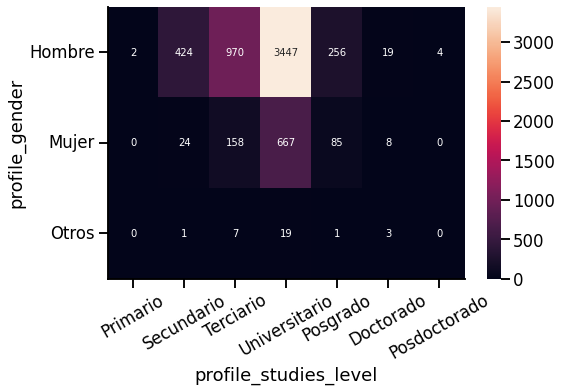

In [ ]:
fig = plt.figure(figsize=(8,5))
exp = pd.crosstab(df.profile_gender,
                  df.profile_studies_level)[sorted_studies_levels]
seaborn.heatmap(exp, annot=True, fmt='g')
plt.xticks(rotation=30)
plt.yticks(rotation=0)
seaborn.despine()

In [ ]:
## Tabla de contingencia normalizada, la suma de los valores da 1, son proporciones, estima probabilidad
pd.crosstab(df.profile_gender, df.profile_studies_level, normalize=True)[sorted_studies_levels]

profile_studies_level,Primario,Secundario,Terciario,Universitario,Posgrado,Doctorado,Posdoctorado
profile_gender,,,,,,,
Hombre,0.000328,0.069565,0.159147,0.565546,0.042002,0.003117,0.000656
Mujer,0.000000,0.003938,0.025923,0.109434,0.013946,0.001313,0.000000
Otros,0.000000,0.000164,0.001148,0.003117,0.000164,0.000492,0.000000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

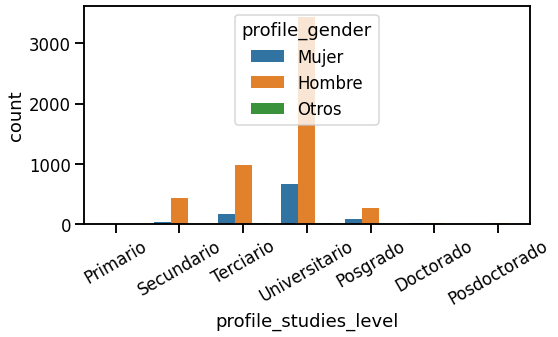

In [ ]:
fig = plt.figure(figsize=(8,4))
seaborn.countplot(df.profile_studies_level,  hue=df.profile_gender, order=sorted_studies_levels )
plt.xticks(rotation=30)

## Varias numéricas

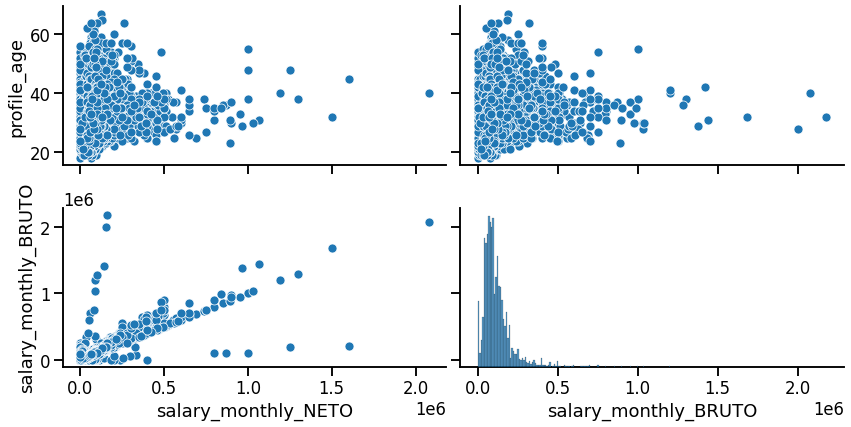

In [ ]:
max_age = 99
seaborn.pairplot(data=df[df.profile_age < max_age],
                 y_vars=['profile_age', 'salary_monthly_BRUTO'],
                 x_vars=['salary_monthly_NETO', 'salary_monthly_BRUTO'],
                 aspect=2, height=3)

<Figure size 576x288 with 0 Axes>

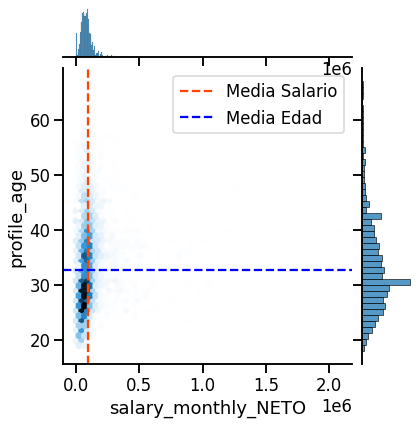

In [ ]:
fig = plt.figure(figsize=(8,4))
seaborn.jointplot(data=df[df.profile_age < max_age], x='salary_monthly_NETO',
                  y='profile_age', kind='hex', height=6) 
plt.axvline(df[df.profile_age < max_age]['salary_monthly_NETO'].mean(), color='orangered',
            linestyle='--', label='Media Salario')
plt.axhline(df[df.profile_age < max_age]['profile_age'].mean(), color='blue',
            linestyle='--', label='Media Edad')
plt.legend()
# Remove scietific notation
plt.ticklabel_format(style='plain', axis='y')

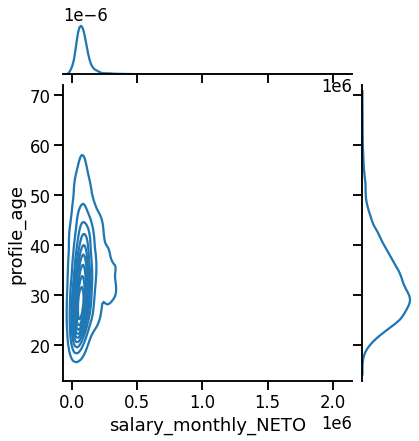

In [ ]:
seaborn.jointplot(data=df[df.profile_age < max_age], x='salary_monthly_NETO',
                  y='profile_age', kind='kde', height=6)

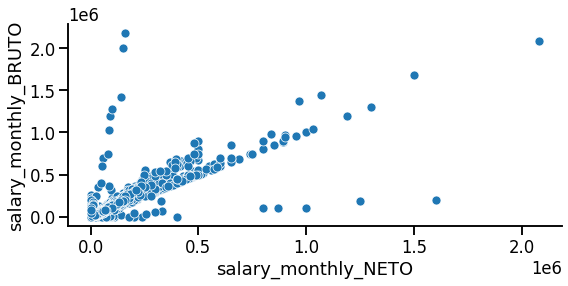

In [ ]:
max_age = 99
seaborn.pairplot(data=df[df.profile_age < max_age], y_vars=['salary_monthly_BRUTO'],
                 x_vars=['salary_monthly_NETO'],
                 aspect=2, height=4)

**Pregunta** ¿Cuáles le parece que son las ventajas de ver de a dos  (o más) variables simultáneamente?

## Mixtas

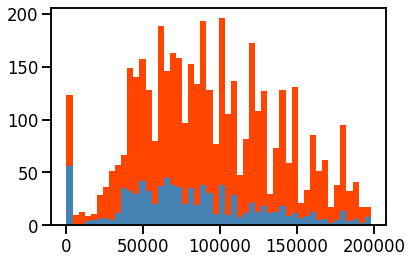

In [ ]:
filtered_df= df[df[salary_col] < 200000]
df_H= filtered_df[ filtered_df['profile_gender']=='Hombre']
df_M=filtered_df[ filtered_df['profile_gender']=='Mujer']

plt.hist(df_H[salary_col], color='orangered', bins=50)
plt.hist(df_M[salary_col], color='steelblue', bins=50) #aca importa el orden, cuidado con la superposición
plt.show()


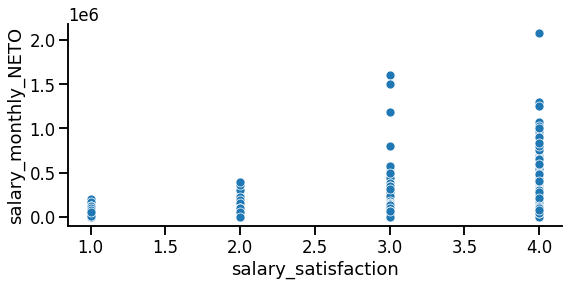

In [ ]:
seaborn.pairplot(data=df[df.profile_age < max_age], y_vars=['salary_monthly_NETO'],
                 x_vars=['salary_satisfaction'],
                 aspect=2, height=4)

Una desventaja de usar un pairplot para variables categóricas es la superposición de los puntos que tienen el mismo valor. Un gráfico que soluciona este problema es el `catplot`

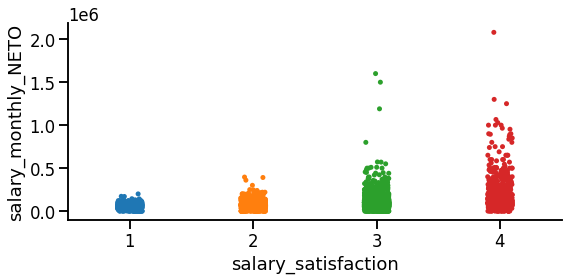

In [ ]:
seaborn.catplot(data=df[df.profile_age < max_age], y='salary_monthly_NETO',  #probar también con profile_age, 'profile_gender'
                x='salary_satisfaction', height=4, aspect=2)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1213: UserWarning: No contour levels were found within the data range.
  **contour_kws,


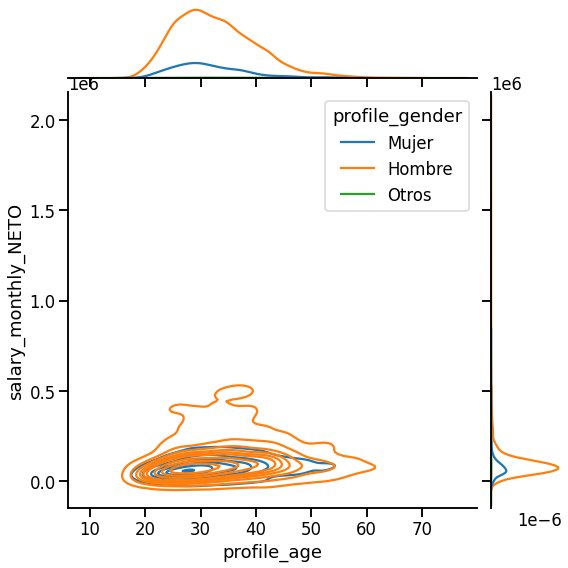

In [ ]:
seaborn.jointplot(data=df[df.profile_age < max_age], x='profile_age',
                  y='salary_monthly_NETO', hue='profile_gender',
                  kind='kde', height=8)

# Práctico para resolver en clase

1. Analice las variables `'salary_monthly_BRUTO'` (salario mensual Bruto) y `'salary_monthly_NETO'` (salario Neto) en conjunto, que comentarios puede hacer al respecto?


(array([-200000.,       0.,  200000.,  400000.,  600000.,  800000.,
        1000000.]), <a list of 7 Text major ticklabel objects>)

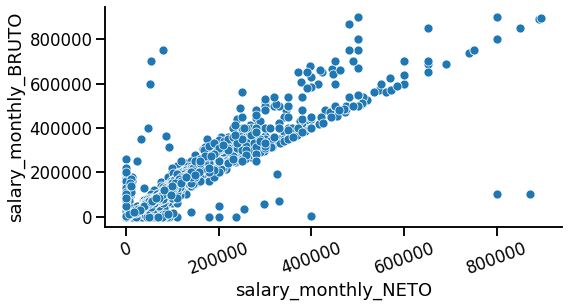

In [ ]:
import numpy as np
max_age = 99
df_limpio=df[(df.profile_age < max_age) & (df.salary_monthly_BRUTO <950000)& (df.salary_monthly_NETO <950000)]
seaborn.pairplot(data=df_limpio, y_vars=['salary_monthly_BRUTO'],
                 x_vars=['salary_monthly_NETO'],
                 aspect=2, height=4)
plt.xticks(rotation=20)


2. Generamos una nueva columna `'salary_monthly_DESCUENTOS'= 'salary_monthly_BRUTO'-'salary_monthly_NETO'`, es decir que contenga los descuentos mensuales. 
3. Analice la distribución de esta columna de datos gráficamente.

In [ ]:
df_limpio['salary_monthly_DESCUENTOS']=df_limpio.salary_monthly_BRUTO-df_limpio.salary_monthly_NETO #generamos una nueva columna
#print(df_limpio.loc[0:2,'salary_monthly_BRUTO']), print(df_limpio.loc[0:2,'salary_monthly_NETO'])
#print(df_limpio['salary_monthly_DESCUENTOS'][0:2]) 
df_limpio[0:3] #mire la última columna 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,profile_gender,profile_age,work_country,work_province,profile_years_experience,work_years_in_company,work_years_in_current_position,work_people_in_charge_of,profile_studies_level,profile_studies_level_state,...,profile_sexual_orientation,profile_has_disabilities,profile_has_disabilities_hiring_difficulties,company_employee_number,company_main_activity,company_recommended,company_diversity_policies,company_extra_benefits,company_best_companies_city,salary_monthly_DESCUENTOS
0,Mujer,26,Argentina,Ciudad Autónoma de Buenos Aires,3.0,3.0,3.0,0,Universitario,En curso,...,Homosexual,NaN,NaN,501-1000,Servicios / Consultoría de Software / Digital,7,2,"Capacitaciones y/o cursos, Comidas pagas / sub...",NaN,10000.0
1,Hombre,29,Argentina,Corrientes,5.0,2.0,2.0,4,Universitario,En curso,...,Heterosexual,Visual,No,201-500,Otras industrias,8,9,"Horarios flexibles, Stock options / RSUs, Viát...",NaN,16000.0
2,Mujer,22,Argentina,Ciudad Autónoma de Buenos Aires,2.0,0.0,0.0,0,Secundario,Completado,...,Bisexual o queer,NaN,No,2001-5000,Otras industrias,6,9,"Clases de gimnasia online, Comidas pagas / sub...",NaN,33000.0


In [ ]:
df_limpio['salary_monthly_DESCUENTOS'].mean()

26106.769855948125

In [ ]:
df_limpio.salary_monthly_BRUTO.mean()-df_limpio.salary_monthly_NETO.mean()

26106.769855948165

Interpretemos correlación entre las columnas de sueldos

In [ ]:
matcov=np.cov(df_limpio.salary_monthly_BRUTO,df_limpio.salary_monthly_NETO)
print('matriz de varianza covarianza:','\n',matcov,'\n')

corr=np.corrcoef(df_limpio.salary_monthly_BRUTO,df_limpio.salary_monthly_NETO)
print('matriz de correlaciones: \n ', corr,'\n')

print('correlación entra ambas variables: ',corr[0,1],'\n')

#df_limpio.salary_monthly_BRUTO.describe().apply(lambda s: '{0:.2f}'.format(s))
#df_limpio.salary_monthly_NETO.describe().apply(lambda s: '{0:.2f}'.format(s))